In [1]:
%pylab inline
from pandas import read_csv

Populating the interactive namespace from numpy and matplotlib


In [2]:
medicare = read_csv("small.csv", header = True)
x = iter([i for i in range(100,1000)])

In [3]:
medicare.ix[x.__next__()]

npi                                                                        1003033838
nppes_provider_last_org_name                                                    AHERN
nppes_provider_first_name                                                        RYAN
nppes_provider_mi                                                                   W
nppes_credentials                                                                  MD
nppes_provider_gender                                                               M
nppes_entity_code                                                                   I
nppes_provider_street1                                                1213 HERMANN DR
nppes_provider_street2                                                      SUITE 650
nppes_provider_city                                                           HOUSTON
nppes_provider_zip                                                          770047018
nppes_provider_state                                  

In [4]:
len(medicare)

2997

In [5]:
import re
re.match("\$(\d*,*\d*\.\d\d)","$1,2.32").group(1)

'1,2.32'

In [6]:
float(medicare["average_Medicare_allowed_amt"][0][1:])
float(medicare["average_submitted_chrg_amt"][0][1:])
float(medicare["average_Medicare_payment_amt"][0][1:])

115.52

In [7]:
avg_allowed = array([0 for i in range(len(medicare))])
for i in range(len(medicare)):
    s = medicare["average_Medicare_allowed_amt"][i][1:]
    if(len(s)>6):
        #print(medicare["provider_type"][i], medicare["hcpcs_description"][i])
        #print(s[:len(s)-7]+s[len(s)-6:])
        avg_allowed[i] = float(s[:len(s)-7]+s[len(s)-6:])
    else:
        avg_allowed[i] = float(s)
        

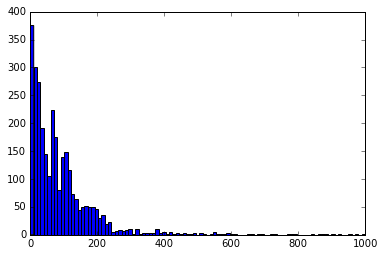

In [8]:
hist(avg_allowed, bins = linspace(0,1000,100));

In [9]:
avg_submit = array([0 for i in range(len(medicare))])
for i in range(len(medicare)):
    s = medicare["average_submitted_chrg_amt"][i][1:]
    if(len(s)>6):
        avg_submit[i] = float(s[:len(s)-7]+s[len(s)-6:])
    else:
        avg_submit[i] = float(s)
avg_payment = array([0 for i in range(len(medicare))])
for i in range(len(medicare)):
    s = medicare["average_Medicare_payment_amt"][i][1:]
    if(len(s)>6):
        avg_payment[i] = float(s[:len(s)-7]+s[len(s)-6:])
    else:
        avg_payment[i] = float(s)

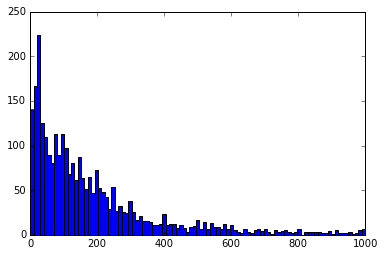

In [10]:
hist(avg_submit, bins = linspace(0,1000,100));

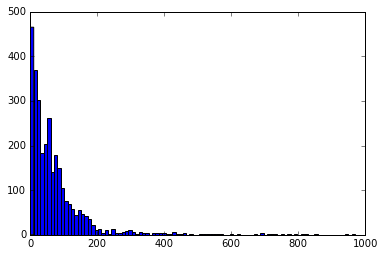

In [11]:
hist(avg_payment, bins = linspace(0,1000,100));

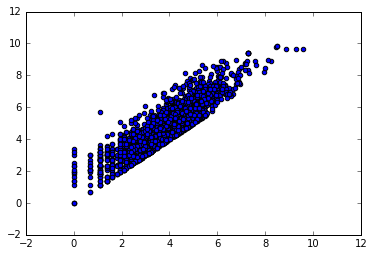

In [12]:
scatter(log(avg_allowed),log(avg_submit))

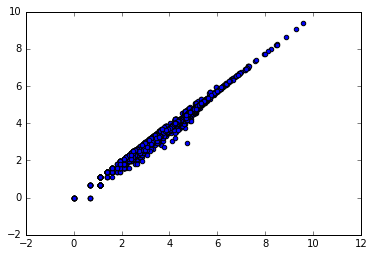

In [13]:
scatter(log(avg_allowed),log(avg_payment))

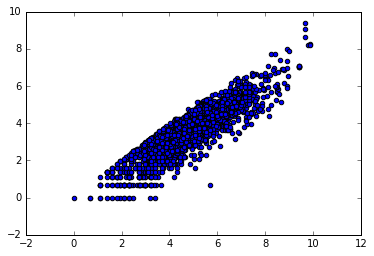

In [14]:
scatter(log(avg_submit),log(avg_payment))

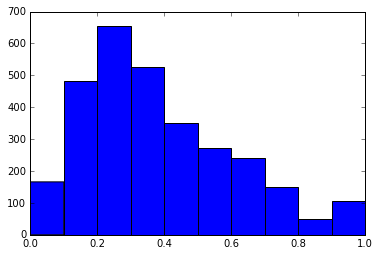

In [15]:
x = avg_payment/avg_submit

import pandas as pd
x  = pd.Series(x).dropna()
hist(x);

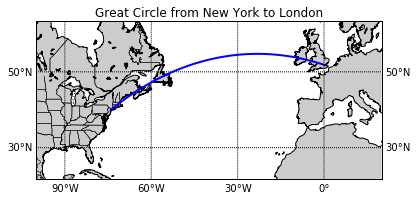

In [16]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# create new figure, axes instances.
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-100.,llcrnrlat=20.,urcrnrlon=20.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
# nylat, nylon are lat/lon of New York
nylat = 40.78; nylon = -73.98
# lonlat, lonlon are lat/lon of London.
lonlat = 51.53; lonlon = 0.08
# draw great circle route between NY and London
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b')
m.drawcoastlines()
m.drawstates()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('Great Circle from New York to London')
plt.show()

In [17]:
p_type = medicare.groupby(["provider_type"])
allowed = p_type["average_Medicare_allowed_amt"].apply(lambda x : x.tolist())

In [18]:
def make_float(ls):
    out = []
    for s in ls:
        s = s[1:]
        if(len(s)>6):
            out.append(float(s[:len(s)-7]+s[len(s)-6:]))
        else:
            out.append(float(s))
    return out

allowed = allowed.apply(make_float)

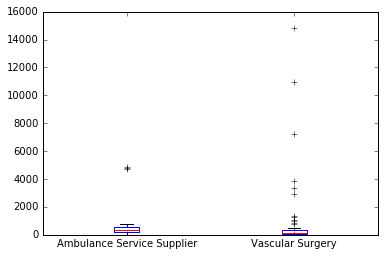

In [19]:
boxplot([allowed.ix[1], allowed.ix[-1]], labels= [allowed.index[1], allowed.index[-1]]);

In [20]:
allowed.index[0]

'Allergy/Immunology'

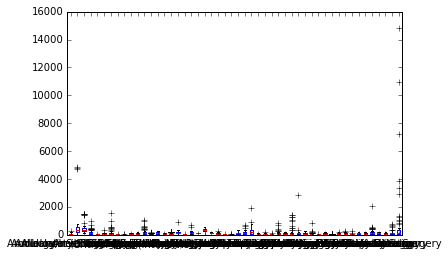

In [21]:
boxplot([x for x in allowed], labels= [x for x in allowed.index]);

In [22]:

p_type = medicare.groupby(["nppes_provider_state"])
number_of_claims = p_type["average_Medicare_allowed_amt"].apply(lambda x : x.tolist()).apply(lambda x : len(x))

In [23]:
number_of_claims

nppes_provider_state
AK                       16
AL                       76
AZ                       58
CA                      235
CO                       23
CT                       43
DE                       21
FL                      263
GA                       22
HI                        5
IL                      147
IN                       79
KS                       42
KY                       74
LA                       40
MA                       36
MD                       60
MI                      223
MN                       67
MO                       96
MS                       59
MT                        1
NC                       81
ND                        1
NE                       11
NH                        6
NJ                      116
NM                        3
NY                      284
OH                      105
OK                        8
OR                        2
PA                      143
PR                       48
RI                        8

In [28]:
states = """CA	1	38,332,521
TX	2	26,448,193
NY	3	19,651,127
FL	4	19,552,860
IL	5	12,882,135
PA	6	12,773,801
OH	7	11,570,808
GA	8	9,992,167
MI	9	9,895,622
NC	10	9,848,060
NJ	11	8,899,339
VA	12	8,260,405
WA	13	6,971,406
MA	14	6,692,824
AZ	15	6,626,624
IN	16	6,570,902
TN	17	6,495,978
MO	18	6,044,171
MD	19	5,928,814
WI	20	5,742,713
MN	21	5,420,380
CO	22	5,268,367
AL	23	4,833,722
SC	24	4,774,839
LA	25	4,625,470
KY	26	4,395,295
OR	27	3,930,065
OK	28	3,850,568
CT	29	3,596,080
IA	30	3,090,416
MS	31	2,991,207
AR	32	2,959,373
UT	33	2,900,872
KS	34	2,893,957
NV	35	2,790,136
NM	36	2,085,287
NE	37	1,868,516
WV	38	1,854,304
ID	39	1,612,136
HI	40	1,404,054
ME	41	1,328,302
NH	42	1,323,459
RI	43	1,051,511
MT	44	1,015,165
DE	45	925,749
SD	46	844,877
AK	47	735,132
ND	48	723,393
DC	49	646,449
VT	50	626,630
WY	51	582,658"""
states = states.split("\n")
states = [x.split("\t") for x in states]
cleaned_states = {}
import re
for x in states:
    cleaned_states[x[0]] = int(re.sub(",","",x[2]))


cleaned_states["PR"] = 3458000
cleaned_states

{'AK': 735132,
 'AL': 4833722,
 'AR': 2959373,
 'AZ': 6626624,
 'CA': 38332521,
 'CO': 5268367,
 'CT': 3596080,
 'DC': 646449,
 'DE': 925749,
 'FL': 19552860,
 'GA': 9992167,
 'HI': 1404054,
 'IA': 3090416,
 'ID': 1612136,
 'IL': 12882135,
 'IN': 6570902,
 'KS': 2893957,
 'KY': 4395295,
 'LA': 4625470,
 'MA': 6692824,
 'MD': 5928814,
 'ME': 1328302,
 'MI': 9895622,
 'MN': 5420380,
 'MO': 6044171,
 'MS': 2991207,
 'MT': 1015165,
 'NC': 9848060,
 'ND': 723393,
 'NE': 1868516,
 'NH': 1323459,
 'NJ': 8899339,
 'NM': 2085287,
 'NV': 2790136,
 'NY': 19651127,
 'OH': 11570808,
 'OK': 3850568,
 'OR': 3930065,
 'PA': 12773801,
 'PR': 3458000,
 'RI': 1051511,
 'SC': 4774839,
 'SD': 844877,
 'TN': 6495978,
 'TX': 26448193,
 'UT': 2900872,
 'VA': 8260405,
 'VT': 626630,
 'WA': 6971406,
 'WI': 5742713,
 'WV': 1854304,
 'WY': 582658}

In [42]:
for x in number_of_claims.index:
    print(x, cleaned_states[x], 100000*number_of_claims[x]/cleaned_states[x])
print(len(number_of_claims))

AK 735132 2.17647987028
AL 4833722 1.57228735951
AZ 6626624 0.875257144513
CA 38332521 0.613056469727
CO 5268367 0.436567915637
CT 3596080 1.1957464795
DE 925749 2.26843345226
FL 19552860 1.34507176955
GA 9992167 0.220172461089
HI 1404054 0.356111659523
IL 12882135 1.14111519558
IN 6570902 1.20227025148
KS 2893957 1.45130007115
KY 4395295 1.6836185057
LA 4625470 0.864776984825
MA 6692824 0.537889536614
MD 5928814 1.01200678584
MI 9895622 2.25352180995
MN 5420380 1.23607569949
MO 6044171 1.5883071475
MS 2991207 1.9724479115
MT 1015165 0.098506154172
NC 9848060 0.822497019718
ND 723393 0.13823744493
NE 1868516 0.58870247833
NH 1323459 0.45335745195
NJ 8899339 1.30346759462
NM 2085287 0.143865089074
NY 19651127 1.44520973275
OH 11570808 0.907456073941
OK 3850568 0.207761556217
OR 3930065 0.0508897435539
PA 12773801 1.1194788458
PR 3458000 1.38808559861
RI 1051511 0.760809920201
SC 4774839 0.460748519479
TN 6495978 0.785101181069
TX 26448193 0.786443141881
UT 2900872 1.86150922895
VA 82604

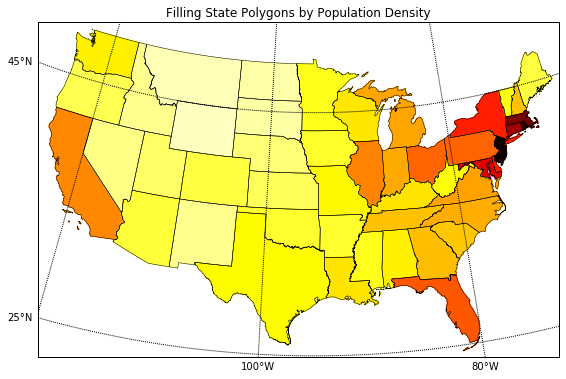

In [26]:
from mpl_toolkits.basemap import Basemap
#see http://matplotlib.org/basemap/
# see also http://matplotlib.org/basemap/users/examples.html
#
from matplotlib.colors import rgb2hex
figure(figsize=(12,6))
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
#http://www.census.gov/geo/cob/bdy/st/st90shp/st99_d90_shp.zip
#http://www.census.gov/geo/www/cob/st1990.html
shp_info = m.readshapefile('st99_d90','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density

popdensity = {
'New Jersey': 438.00,
'Rhode Island': 387.35,
'Massachusetts': 312.68,
'Connecticut': 271.40,
'Maryland': 209.23,
'New York': 155.18,
'Delaware': 154.87,
'Florida': 114.43,
'Ohio': 107.05,
'Pennsylvania': 105.80,
'Illinois': 86.27,
'California': 83.85,
'Hawaii': 72.83,
'Virginia': 69.03,
'Michigan': 67.55,
'Indiana': 65.46,
'North Carolina': 63.80,
'Georgia': 54.59,
'Tennessee': 53.29,
'New Hampshire': 53.20,
'South Carolina': 51.45,
'Louisiana': 39.61,
'Kentucky': 39.28,
'Wisconsin': 38.13,
'Washington': 34.20,
'Alabama': 33.84,
'Missouri': 31.36,
'Texas': 30.75,
'West Virginia': 29.00,
'Vermont': 25.41,
'Minnesota': 23.86,
'Mississippi': 23.42,
'Iowa': 20.22,
'Arkansas': 19.82,
'Oklahoma': 19.40,
'Arizona': 17.43,
'Colorado': 16.01,
'Maine': 15.95,
'Oregon': 13.76,
'Kansas': 12.69,
'Utah': 10.50,
'Nebraska': 8.60,
'Nevada': 7.03,
'Idaho': 6.04,
'New Mexico': 5.79,
'South Dakota': 3.84,
'North Dakota': 3.59,
'Montana': 2.39,
'Wyoming': 1.96,
'Alaska': 0.42}
##print shp_info
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = cm.hot # use 'hot' colormap  #try jet! or cool or winter,
# see http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps
vmin = 0; vmax = 450 # set range.
##print len(m.states_info),m.states_info[0].keys()
for shapedict in m.states_info:
  statename = shapedict['NAME']
  if statename != 'District of Columbia': # skip DC, it's not a state!
    pop = popdensity[statename]
    # calling colormap with value between 0 and 1 returns
    # rgba value. Invert color range (hot colors are high
    # population), take sqrt root to spread out colors more.
    colors[statename] = cmap(1.-math.sqrt((pop-vmin)/(vmax-vmin)))[:3]
  statenames.append(statename)
# cycle through state names, color each one.
for nshape,seg in enumerate(m.states):
  xx,yy = zip(*seg)
  if statenames[nshape] != 'District of Columbia': # skip DC
     color = rgb2hex(colors[statenames[nshape]]) 
     fill(xx,yy,color,edgecolor=color)
# draw meridians and parallels.
m.drawparallels(arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(arange(-120,-40,20),labels=[0,0,0,1])
title('Filling State Polygons by Population Density')
None

In [27]:
state_abr = """Alabama	Ala.	AL
Alaska	Alaska	AK
American Samoa	 	AS
Arizona	Ariz.	AZ
Arkansas	Ark.	AR
California	Calif.	CA
Colorado	Colo.	CO
Connecticut	Conn.	CT
Delaware	Del.	DE
District of Columbia	D.C.	DC
Florida	Fla.	FL
Georgia	Ga.	GA
Guam	Guam	GU
Hawaii	Hawaii	HI
Idaho	Idaho	ID
Illinois	Ill.	IL
Indiana	Ind.	IN
Iowa	Iowa	IA
Kansas	Kans.	KS
Kentucky	Ky.	KY
Louisiana	La.	LA
Maine	Maine	ME
Maryland	Md.	MD
Marshall Islands	 	MH
Massachusetts	Mass.	MA
Michigan	Mich.	MI
Micronesia	 	FM
Minnesota	Minn.	MN
Mississippi	Miss.	MS
Missouri	Mo.	MO
Montana	Mont.	MT
Nebraska	Nebr.	NE
Nevada	Nev.	NV
New Hampshire	N.H.	NH
New Jersey	N.J.	NJ
New Mexico	N.M.	NM
New York	N.Y.	NY
North Carolina	N.C.	NC
North Dakota	N.D.	ND
Northern Marianas	 	MP
Ohio	Ohio	OH
Oklahoma	Okla.	OK
Oregon	Ore.	OR
Palau	 	PW
Pennsylvania	Pa.	PA
Puerto Rico	P.R.	PR
Rhode Island	R.I.	RI
South Carolina	S.C.	SC
South Dakota	S.D.	SD
Tennessee	Tenn.	TN
Texas	Tex.	TX
Utah	Utah	UT
Vermont	Vt.	VT
Virginia	Va.	VA
Virgin Islands	V.I.	VI
Washington	Wash.	WA
West Virginia	W.Va.	WV
Wisconsin	Wis.	WI
Wyoming	Wyo.	WY"""
state_to_abr = {}
abr_to_state = {}
state_abr = state_abr.split("\n")
for line in state_abr:
    x = line.split("\t")
    state = x[0]
    abr = x[2]
    state_to_abr[state] = abr
    abr_to_state[abr] = state
len(abr_to_state)

59

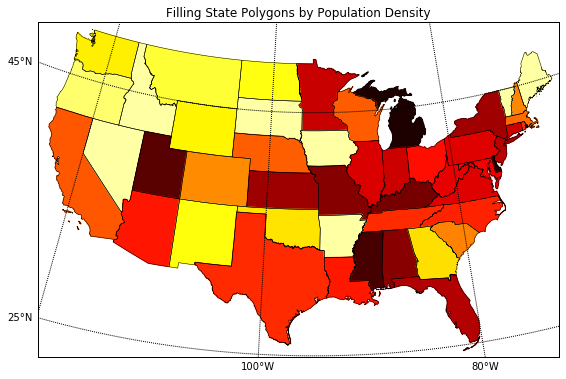

In [47]:
all_together_now = {}
for x in number_of_claims.index:
    all_together_now[abr_to_state[x]] ={"pop":cleaned_states[x], \
                          "claims/capita":500000*number_of_claims[x]/cleaned_states[x],\
                         "abr":x }
all_together_now["Idaho"] ={"pop":cleaned_states["ID"],"claims/capita":0.1,"abr":"ID"}
all_together_now["Maine"] ={"pop":cleaned_states["ME"],"claims/capita":0.1,"abr":"ME"}
all_together_now["South Dakota"] ={"pop":cleaned_states["SD"],"claims/capita":0.1,"abr":"SD"}
all_together_now["Vermont"] ={"pop":cleaned_states["VT"],"claims/capita":0.1,"abr":"VT"}
all_together_now["Iowa"] ={"pop":cleaned_states["IA"],"claims/capita":0.1,"abr":"IA"}
all_together_now["Nevada"] ={"pop":cleaned_states["NV"],"claims/capita":0.1,"abr":"NV"}
all_together_now["Arkansas"] ={"pop":cleaned_states["AR"],"claims/capita":0.1,"abr":"AR"}
figure(figsize=(12,6))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
shp_info = m.readshapefile('st99_d90','states',drawbounds=True)
colors={}
statenames=[]
cmap = cm.hot 
vmin = 0; vmax = 12 # set range.
##print len(m.states_info),m.states_info[0].keys()
for shapedict in m.states_info:
  statename = shapedict['NAME']
  if statename != 'District of Columbia': # skip DC, it's not a state!
    pop = all_together_now[statename]["claims/capita"]
    
    colors[statename] = cmap(1.-math.sqrt((pop-vmin)/(vmax-vmin)))[:3]
  statenames.append(statename)
# cycle through state names, color each one.
for nshape,seg in enumerate(m.states):

  xx,yy = zip(*seg)
  if statenames[nshape] != 'District of Columbia': # skip DC
     color = rgb2hex(colors[statenames[nshape]]) 
     fill(xx,yy,color,edgecolor=color)
# draw meridians and parallels.
m.drawparallels(arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(arange(-120,-40,20),labels=[0,0,0,1])
title('Filling State Polygons by Population Density')
None
    


In [1]:
"""
Extension for disabling autoscrolling long output, which is super annoying sometimes
Usage:
    %load_ext disable_autoscroll
You can also put the js snippet below in profile_dir/static/js/custom.js
"""

from IPython.display import display, Javascript

disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""

def load_ipython_extension(ip):
    display(Javascript(disable_js))
    print ("autoscrolling long output is disabled")